In [0]:
!git clone https://github.com/SonaliDasgupta/goodbooks-10k

Cloning into 'goodbooks-10k'...
remote: Enumerating objects: 66, done.
remote: Total 66 (delta 0), reused 0 (delta 0), pack-reused 66
Unpacking objects: 100% (66/66), done.
Checking out files: 100% (20/20), done.


In [0]:
import pandas as pd


ModuleNotFoundError: ignored

In [0]:
!pip install fastai pytorch

    100% |████████████████████████████████| 153kB 6.6MB/s 
    100% |████████████████████████████████| 1.9MB 15.2MB/s 
    100% |████████████████████████████████| 23.3MB 1.7MB/s 
    100% |████████████████████████████████| 591.8MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x617cc000 @  0x7f803994a2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 112kB 9.5MB/s 
    100% |████████████████████████████████| 61kB 22.7MB/s 
  Running setup.py bdist_wheel for pytorch ... - error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-cbshmuyn/pytorch/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code,

In [0]:
ratings_df = pd.read_csv('goodbooks-10k/ratings.csv')

from fastai.collab import CollabDataBunch
from fastai.collab import collab_learner


In [0]:
import torch.optim as optim
from fastai.metrics import exp_rmspe
data = CollabDataBunch.from_df(ratings_df) #no test dataset here
wd = 1e-3
m = collab_learner(data, n_factors = 50, y_range = (1,5), metrics = [exp_rmspe])
#m.opt_fn = optim.Adam(params = m.parameters, lr = 0.5)
#choosing 50 factors as of now, might try with half the size of dataset later
#ratings go from 1 to 5 hence y_range

In [0]:
from fastai.train import lr_find
lr_find(m)
m.recorder.plot_metrics

epoch,train_loss,valid_loss,exp_rmspe


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


<bound method Recorder.plot_metrics of Recorder(learn=CollabLearner(data=TabularDataBunch;

Train: LabelList
y: FloatList (4781184 items)
[FloatItem 5.0, FloatItem 4.0, FloatItem 5.0, FloatItem 4.0, FloatItem 3.0]...
Path: .
x: CollabList (4781184 items)
[CollabLine user_id 1; book_id 258; , CollabLine user_id 2; book_id 4081; , CollabLine user_id 2; book_id 260; , CollabLine user_id 2; book_id 26; , CollabLine user_id 2; book_id 315; ]...
Path: .;

Valid: LabelList
y: FloatList (1195295 items)
[FloatItem 3.0, FloatItem 4.0, FloatItem 3.0, FloatItem 5.0, FloatItem 4.0]...
Path: .
x: CollabList (1195295 items)
[CollabLine user_id 9238; book_id 9810; , CollabLine user_id 2432; book_id 8409; , CollabLine user_id 25359; book_id 2124; , CollabLine user_id 31840; book_id 253; , CollabLine user_id 16248; book_id 567; ]...
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(53425, 50)
  (i_weight): Embedding(10001, 50)
  (u_bias): Embedding(53425, 1)
  (i_bias): Embedding(100

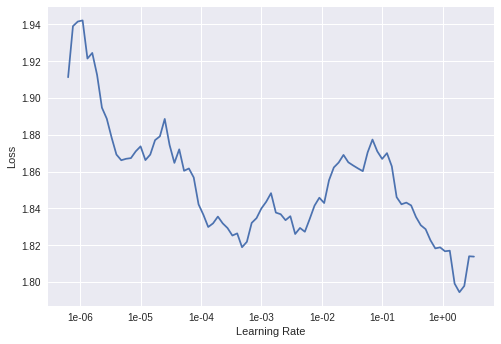

In [0]:
m.recorder.plot()

In [0]:
m.opt = optim.Adam(params = m.model.parameters(), lr = 0.5)
#m.opt.mom = 0.9
m.fit(3, lr = 0.5, wd = 1e-5) #PULL CODE IN SPYDER  AND SEE OPTIM WRAPPER USAGE , TRY WITH ADAM LATER AND ALSO WEIGHT DECAY AND MOMENTUM
#TRY WITH BOTH ADAM AND SGD

epoch,train_loss,valid_loss,exp_rmspe


KeyboardInterrupt: ignored

In [0]:
#with SGD optimization
m1 = collab_learner(data, n_factors = 50, y_range = (1,5), metrics = [exp_rmspe])
m1.opt = optim.SGD(params = m1.model.parameters(), lr = 0.5, momentum = 0.9)
m1.opt.mom = 0.9
m1.fit(3, lr = 0.05)

#SGD performs way better
#TRY ONCE WITH SAME WEiGHT DECAY

epoch,train_loss,valid_loss,exp_rmspe
1,0.804850,0.801959,2.519441
2,0.913815,0.999132,3.304800


KeyboardInterrupt: ignored

In [0]:
#1.  interpret embeddings
#2. Create columnar model using the metatdata, and compare the 2 models on a metric

In [0]:
m1.model.i_weight #analyzing movie categories
from sklearn.decomposition import PCA


Embedding(53425, 50)